In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

In [3]:
rc_data = []
with open('Data/rowbycolumn.txt', 'r') as file:
  for line in file:
    columns = line.strip().replace(',', '').split()
    rc_data.append([int(columns[1]), float(columns[2])])

cr_data = []
with open('Data/columnbyrow.txt', 'r') as file:
  for line in file:
    columns = line.strip().replace(',', '').split()
    cr_data.append([int(columns[1]), float(columns[2])])

i_data = []
with open('Data/intrinsic.txt', 'r') as file:
  for line in file:
    columns = line.strip().replace(',', '').split()
    i_data.append([int(columns[1]), float(columns[2])])

rc_data = np.array(rc_data)
cr_data = np.array(cr_data)
i_data = np.array(i_data)

In [4]:
n_values = np.unique(rc_data[:,0])
n_values = n_values[1:]

times_rc = []
times_cr = []
times_i = []

for n in n_values:
  times_for_rc = rc_data[rc_data[:, 0] == n, 1]
  times_for_cr = cr_data[cr_data[:, 0] == n, 1]
  times_for_i = i_data[i_data[:, 0] == n, 1]
  
  times_rc.append(np.mean(times_for_rc))
  times_cr.append(np.mean(times_for_cr))
  times_i.append(np.mean(times_for_i))

times_rc = np.array(times_rc)
times_cr = np.array(times_cr)
times_i = np.array(times_i)

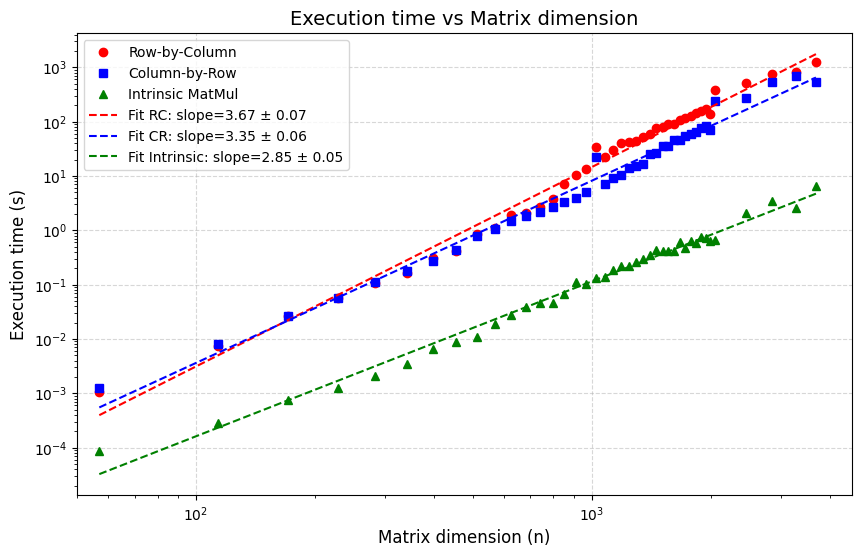

In [7]:
# Perform linear regression on each data set
slope_cr, intercept_cr, _, _, stderr_cr = linregress(np.log(n_values), np.log(times_cr))
slope_rc, intercept_rc, _, _, stderr_rc = linregress(np.log(n_values), np.log(times_rc))
slope_i, intercept_i, _, _, stderr_i = linregress(np.log(n_values), np.log(times_i))

# Compute the fitted lines
fitted_cr = np.exp(intercept_cr) * n_values ** slope_cr
fitted_rc = np.exp(intercept_rc) * n_values ** slope_rc
fitted_i = np.exp(intercept_i) * n_values ** slope_i

# Plot the original data and fitted lines
plt.figure(figsize=(10, 6))

# Original data
plt.loglog(n_values, times_cr, 'ro', label='Row-by-Column')
plt.loglog(n_values, times_rc, 'bs', label='Column-by-Row')
plt.loglog(n_values, times_i, 'g^', label='Intrinsic MatMul')

# Fitted lines with error bars for slope
plt.loglog(n_values, fitted_cr, 'r--', label=f'Fit RC: slope={slope_cr:.2f} ± {stderr_cr:.2f}')
plt.loglog(n_values, fitted_rc, 'b--', label=f'Fit CR: slope={slope_rc:.2f} ± {stderr_rc:.2f}')
plt.loglog(n_values, fitted_i, 'g--', label=f'Fit Intrinsic: slope={slope_i:.2f} ± {stderr_i:.2f}')

# Plot formatting
plt.xlabel('Matrix dimension (n)', fontsize=12)
plt.ylabel('Execution time (s)', fontsize=12)
plt.title('Execution time vs Matrix dimension', fontsize=14)
plt.legend()
plt.xlim(left=50)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()